# TOP

In [1]:
%reset -f
import ROOT

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetGridColor(16)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)
ROOT.gStyle.SetPadRightMargin(0.05)
ROOT.gStyle.SetPadLeftMargin(0.06)
ROOT.gStyle.SetTitleOffset(0.8, 'Y')


%run -i eppi0_columns.py


fname = "data/lvl1_eppi0.inb.qa.root"
#fname = "data/lvl1_eppi0.outb.qa.root"

dsid = 'inb' if 'inb' in fname else 'outb'

df = ROOT.RDataFrame("h22", fname)

df = define_eppi0_columns_using_proton(df)

%run -i eppi0_binning_scheme_v2.py
shards,df  = define_eppi0_bins(df,dsid)

Welcome to JupyROOT 6.24/06


---------------

In [2]:
rdf = df.Define("g1","sqrt(g1x*g1x + g1y*g1y + g1z*g1z)").Define("g2","sqrt(g2x*g2x + g2y*g2y + g2z*g2z)")
rdf = rdf.Define("dgsec","abs(g2sec-g1sec)")
rdf = rdf.Define("dpt","sqrt(dpx*dpx + dpy*dpy)")

rdf = rdf.Filter("g1>0.6 && g2>0.6 && dgsec==0")
rdf = rdf.Filter("q2>2 && ww>2 && yy<0.75")

---------------

---------------

---------------

In [3]:
hqx = rdf.Histo2D(("hqx","Q^{2} vs x_{B};x_{B};Q^{2} [GeV^{2}]",200,0.07,0.84,200,1.5,12), "xb","q2")
hw = rdf.Histo1D(("hw","W;W [GeV]",200,1.7,4), "ww")

In [4]:
helepth = rdf.Histo2D(("helepth","electron polar angle vs momentum;momentum [GeV];angle #theta", 200,2,9, 200, 0, 40), "pe","the")
helepfi = rdf.Histo2D(("helepfi","electron azimuthal angle vs momentum;momentum [GeV];angle #phi", 200,2,9, 180, 0, 360), "pe","fie")

hpropth = rdf.Histo2D(("hpropth","proton polar angle vs momentum;momentum [GeV];angle #theta", 200,0,5, 200, 0, 50), "pp","thp")
hpropfi = rdf.Histo2D(("hpropfi","proton azimuthal angle vs momentum;momentum [GeV];angle #phi", 200,0,5, 180, 0, 360), "pp","fip")

hgampth = rdf.Histo2D(("hgampth","gamma polar angle vs momentum;momentum [GeV];angle #theta", 200,0,7, 200, 0, 40), "pg1","thg1")
hgampfi = rdf.Histo2D(("hgampfi","gamma azimuthal angle vs momentum;momentum [GeV];angle #phi", 200,0,7, 180, 0, 360), "pg1","fig1")
hgampth2 = rdf.Histo2D(("hgampth2","gamma polar angle vs momentum;momentum [GeV];angle #theta", 200,0,7, 200, 0, 40), "pg2","thg2")
hgampfi2 = rdf.Histo2D(("hgampfi2","gamma azimuthal angle vs momentum;momentum [GeV];angle #phi", 200,0,7, 180, 0, 360), "pg2","fig2")

In [5]:
hmemm2 = rdf.Histo2D(("hmemm2","MM^{2}(epX) vs Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV];MM^{2} [GeV^{2}]",100,-1,1, 100,-0.8,1.5), "misse", 'mm2')

hdpxmm2 = rdf.Histo2D(("hdpxmm2","MM^{2}(epX) vs #Delta P_{x} for (ep#rightarrow ep#pi^{0}X);#Delta P_{x} [GeV];MM^{2} [GeV^{2}]",100,-1,1, 100,-0.8,1.5), "dpx", 'mm2')
hdpymm2 = rdf.Histo2D(("hdpymm2","MM^{2}(epX) vs #Delta P_{y} for (ep#rightarrow ep#pi^{0}X);#Delta P_{y} [GeV];MM^{2} [GeV^{2}]",100,-1,1, 100,-0.8,1.5), "dpy", 'mm2')
hdpzmm2 = rdf.Histo2D(("hdpzmm2","MM^{2}(epX) vs #Delta P_{z} for (ep#rightarrow ep#pi^{0}X);#Delta P_{z} [GeV];MM^{2} [GeV^{2}]",100,-1,1, 100,-0.8,1.5), "dpz", 'mm2')

hdphimm2 = rdf.Histo2D(("hdphimm2","MM^{2}(epX) vs #Delta #phi_{#pi X} = #phi_{#pi} - #phi_{epX};#Delta #phi [#circ];MM^{2} [GeV^{2}]",100,-10,10, 100,-0.8,1.5), "dphi", 'mm2')

---------------

In [6]:
hmgg = rdf.Histo1D(("hmgg","Mass of two photons;Mass of two photons [GeV]",200,0.07,0.2), "mgg")

hmm2 = rdf.Histo1D(("hmm2","Missing mass^{2} for (ep#rightarrow epX);Missing mass^{2} [GeV^{2}]",200,-0.81,5), "mm2")
hmmp = rdf.Histo1D(("hmmp","Missing mass for (ep#rightarrow e#pi^{0}X);Missing mass [GeV]",200,0.5,1.5), "mmp")
hme = rdf.Histo1D(("hme","Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV]",200,-1,1), "misse")

hdpx = rdf.Histo1D(("hdpx","#Delta P_{x} for (ep#rightarrow ep#pi^{0}X);#Delta P_{x} [GeV]",200,-1,1), "dpx")
hdpy = rdf.Histo1D(("hdpy","#Delta P_{y} for (ep#rightarrow ep#pi^{0}X);#Delta P_{y} [GeV]",200,-1,1), "dpy")
hdpz = rdf.Histo1D(("hdpz","#Delta P_{z} for (ep#rightarrow ep#pi^{0}X);#Delta P_{z} [GeV]",200,-1,1), "dpz")

hdphi = rdf.Histo1D(("hdphi","#Delta #phi_{#pi X} = #phi_{#pi} - #phi_{epX};#Delta #phi [#circ]",200,-10,10), "dphi")

---------------

In [7]:
edf = rdf.Filter("mm2<1")

emgg = edf.Histo1D(("emgg","Mass of two photons;Mass of two photons [GeV]",200,0.07,0.2), "mgg")

emm2 = edf.Histo1D(("emm2","Missing mass^{2} for (ep#rightarrow epX);Missing mass^{2} [GeV^{2}]",200,-0.81,1), "mm2")
emmp = edf.Histo1D(("emmp","Missing mass for (ep#rightarrow e#pi^{0}X);Missing mass [GeV]",200,0.5,1.5), "mmp")
eme = edf.Histo1D(("eme","Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV]",200,-1,1), "misse")

edpx = edf.Histo1D(("edpx","#Delta P_{x} for (ep#rightarrow ep#pi^{0}X);#Delta P_{x} [GeV]",200,-1,1), "dpx")
edpy = edf.Histo1D(("edpy","#Delta P_{y} for (ep#rightarrow ep#pi^{0}X);#Delta P_{y} [GeV]",200,-1,1), "dpy")
edpz = edf.Histo1D(("edpz","#Delta P_{z} for (ep#rightarrow ep#pi^{0}X);#Delta P_{z} [GeV]",200,-1,1), "dpz")

edphi = edf.Histo1D(("edphi","#Delta #phi_{#pi X} = #phi_{#pi} - #phi_{epX};#Delta #phi [#circ]",200,-10,10), "dphi")

---------------

In [8]:
kdf = rdf.Filter("mm2<1 && abs(dphi)<4")

kmgg = kdf.Histo1D(("kmgg","Mass of two photons;Mass of two photons [GeV]",200,0.07,0.2), "mgg")

kmm2 = kdf.Histo1D(("kmm2","Missing mass^{2} for (ep#rightarrow epX);Missing mass^{2} [GeV^{2}]",200,-0.81,1), "mm2")
kmmp = kdf.Histo1D(("kmmp","Missing mass for (ep#rightarrow e#pi^{0}X);Missing mass [GeV]",200,0.5,1.5), "mmp")
kme = kdf.Histo1D(("kme","Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV]",200,-1,1), "misse")

kdpx = kdf.Histo1D(("kdpx","#Delta P_{x} for (ep#rightarrow ep#pi^{0}X);#Delta P_{x} [GeV]",200,-1,1), "dpx")
kdpy = kdf.Histo1D(("kdpy","#Delta P_{y} for (ep#rightarrow ep#pi^{0}X);#Delta P_{y} [GeV]",200,-1,1), "dpy")
kdpz = kdf.Histo1D(("kdpz","#Delta P_{z} for (ep#rightarrow ep#pi^{0}X);#Delta P_{z} [GeV]",200,-1,1), "dpz")

---------------

In [9]:
ldf = rdf.Filter("mm2<1 && abs(dpx)<0.3 && abs(dpy)<0.3")

lmgg = ldf.Histo1D(("lmgg","Mass of two photons;Mass of two photons [GeV]",200,0.07,0.2), "mgg")

lmm2 = ldf.Histo1D(("lmm2","Missing mass^{2} for (ep#rightarrow epX);Missing mass^{2} [GeV^{2}]",200,-0.81,1), "mm2")
lmmp = ldf.Histo1D(("lmmp","Missing mass for (ep#rightarrow e#pi^{0}X);Missing mass [GeV]",200,0.5,1.5), "mmp")
lme = ldf.Histo1D(("lme","Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV]",200,-1,1), "misse")

ldpz = ldf.Histo1D(("ldpz","#Delta P_{z} for (ep#rightarrow ep#pi^{0}X);#Delta P_{z} [GeV]",200,-1,1), "dpz")
ldphi = ldf.Histo1D(("ldphi","#Delta #phi_{#pi X} = #phi_{#pi} - #phi_{epX};#Delta #phi [#circ]",200,-10,10), "dphi")

---------------

In [10]:
mdf = rdf.Filter("mm2<1 && abs(dphi)<4 && abs(dpx)<0.3 && abs(dpy)<0.3")

mmgg = mdf.Histo1D(("mmgg","Mass of two photons;Mass of two photons [GeV]",200,0.07,0.2), "mgg")

mmm2 = mdf.Histo1D(("mmm2","Missing mass^{2} for (ep#rightarrow epX);Missing mass^{2} [GeV^{2}]",200,-0.81,1), "mm2")
mmmp = mdf.Histo1D(("mmmp","Missing mass for (ep#rightarrow e#pi^{0}X);Missing mass [GeV]",200,0.5,1.5), "mmp")
mme = mdf.Histo1D(("mme","Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV]",200,-1,1), "misse")

mdpz = mdf.Histo1D(("mdpz","#Delta P_{z} for (ep#rightarrow ep#pi^{0}X);#Delta P_{z} [GeV]",200,-1,1.4), "dpz")

---------------

In [11]:
ndf = rdf.Filter("mm2<1 && abs(dphi)<4 && abs(dpx)<0.3 && abs(dpy)<0.3 && dpz>-0.5 && dpz<0.725")

nmgg = ndf.Histo1D(("nmgg","Mass of two photons;Mass of two photons [GeV]",200,0.07,0.2), "mgg")

nmm2 = ndf.Histo1D(("nmm2","Missing mass^{2} for (ep#rightarrow epX);Missing mass^{2} [GeV^{2}]",200,-0.81,1), "mm2")
nmmp = ndf.Histo1D(("nmmp","Missing mass for (ep#rightarrow e#pi^{0}X);Missing mass [GeV]",200,0.5,1.5), "mmp")
nme = ndf.Histo1D(("nme","Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV]",200,-1,1), "misse")

---------------

In [12]:
odf = rdf.Filter("mm2<1 && abs(dphi)<4 && abs(dpx)<0.3 && abs(dpy)<0.3 && dpz>-0.5 && dpz<0.725 && mm2>-0.3 && mm2<0.3")

omgg = odf.Histo1D(("omgg","Mass of two photons;Mass of two photons [GeV]",200,0.07,0.2), "mgg")
ommp = odf.Histo1D(("ommp","Missing mass for (ep#rightarrow e#pi^{0}X);Missing mass [GeV]",200,0.5,1.5), "mmp")
ome = odf.Histo1D(("ome","Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV]",200,-1,1), "misse")

---------------

---------------

---------------

In [13]:
hgampth.Add(hgampth2.GetValue())
hgampfi.Add(hgampfi2.GetValue())

ll = ROOT.TLine()
ll.SetLineColor(4)

---------------

---------------

---------------

# Kinematic distrubutions (W, Q2 vs xB)

Info in <TCanvas::Print>: pdf file pdf/lvl1.w.inb.pdf has been created


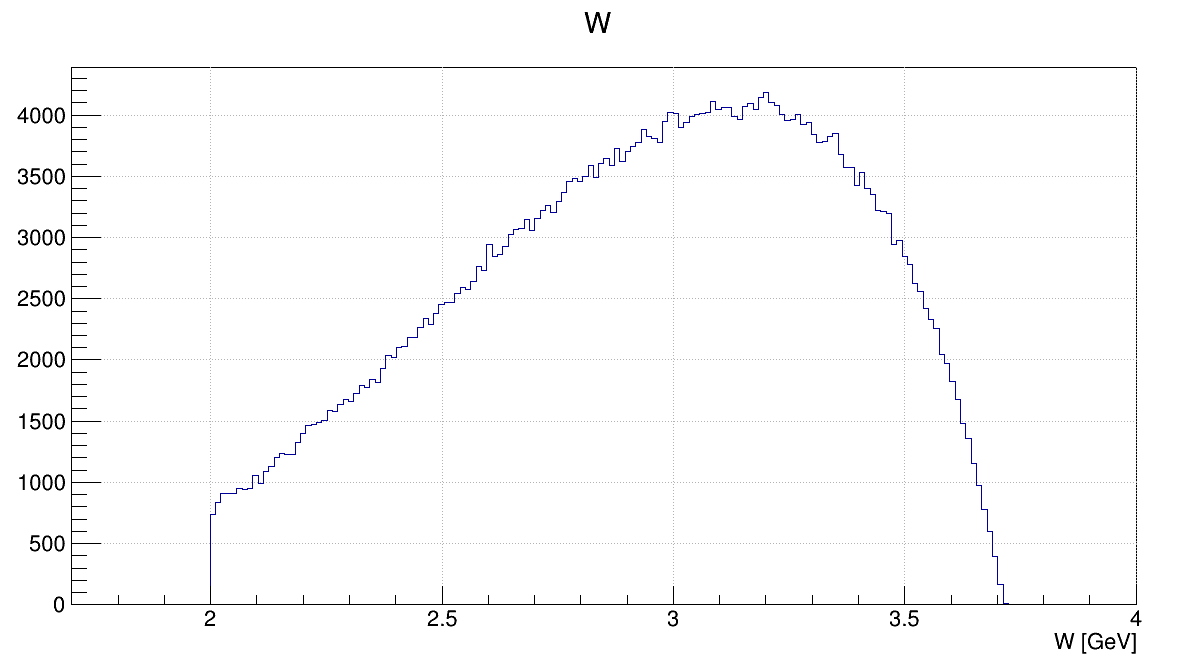

In [14]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hw.Draw()
c1.Print(f"pdf/lvl1.w.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.q2xb.inb.pdf has been created


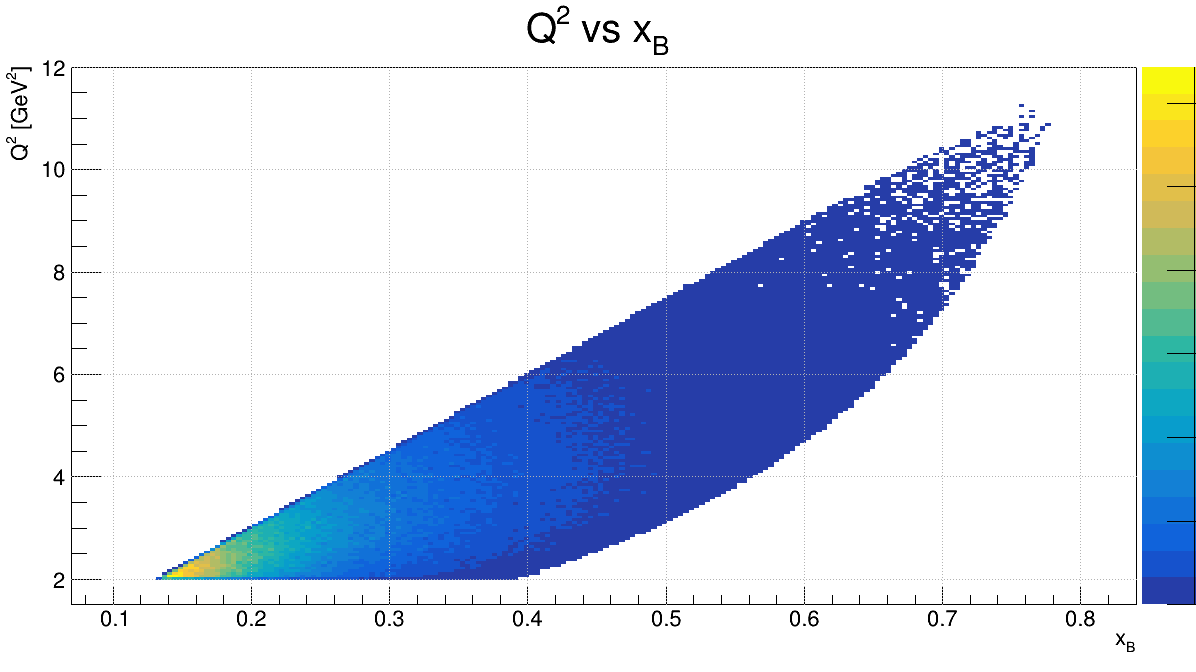

In [15]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hqx.Draw("colz")
c1.Print(f"pdf/lvl1.q2xb.{dsid}.pdf")

---------------

---------------

---------------

# Particles kinematic coverages

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.electron.pthfi.inb.pdf has been created


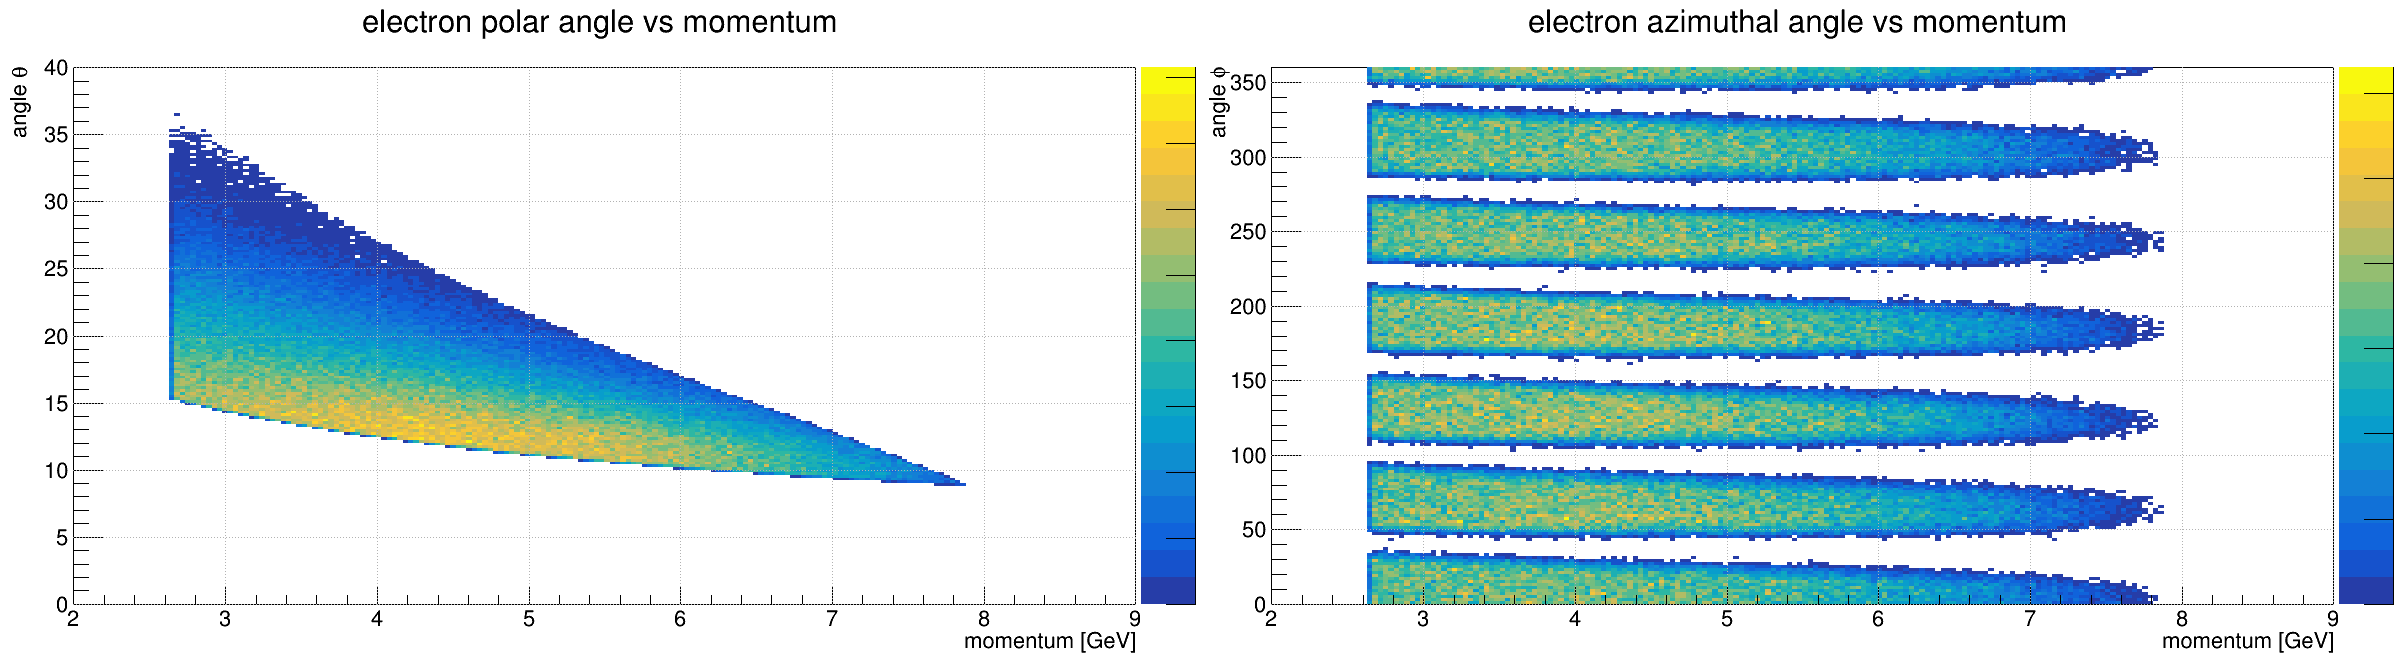

In [16]:
c1 = ROOT.TCanvas("c1","c1",2400,700)
c1.Divide(2,1,0.001,0.001)
c1.Draw()
c1.cd(1)
helepth.Draw("colz")
c1.cd(2)
helepfi.Draw("colz")
c1.Print(f"pdf/lvl1.electron.pthfi.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.proton.pthfi.inb.pdf has been created


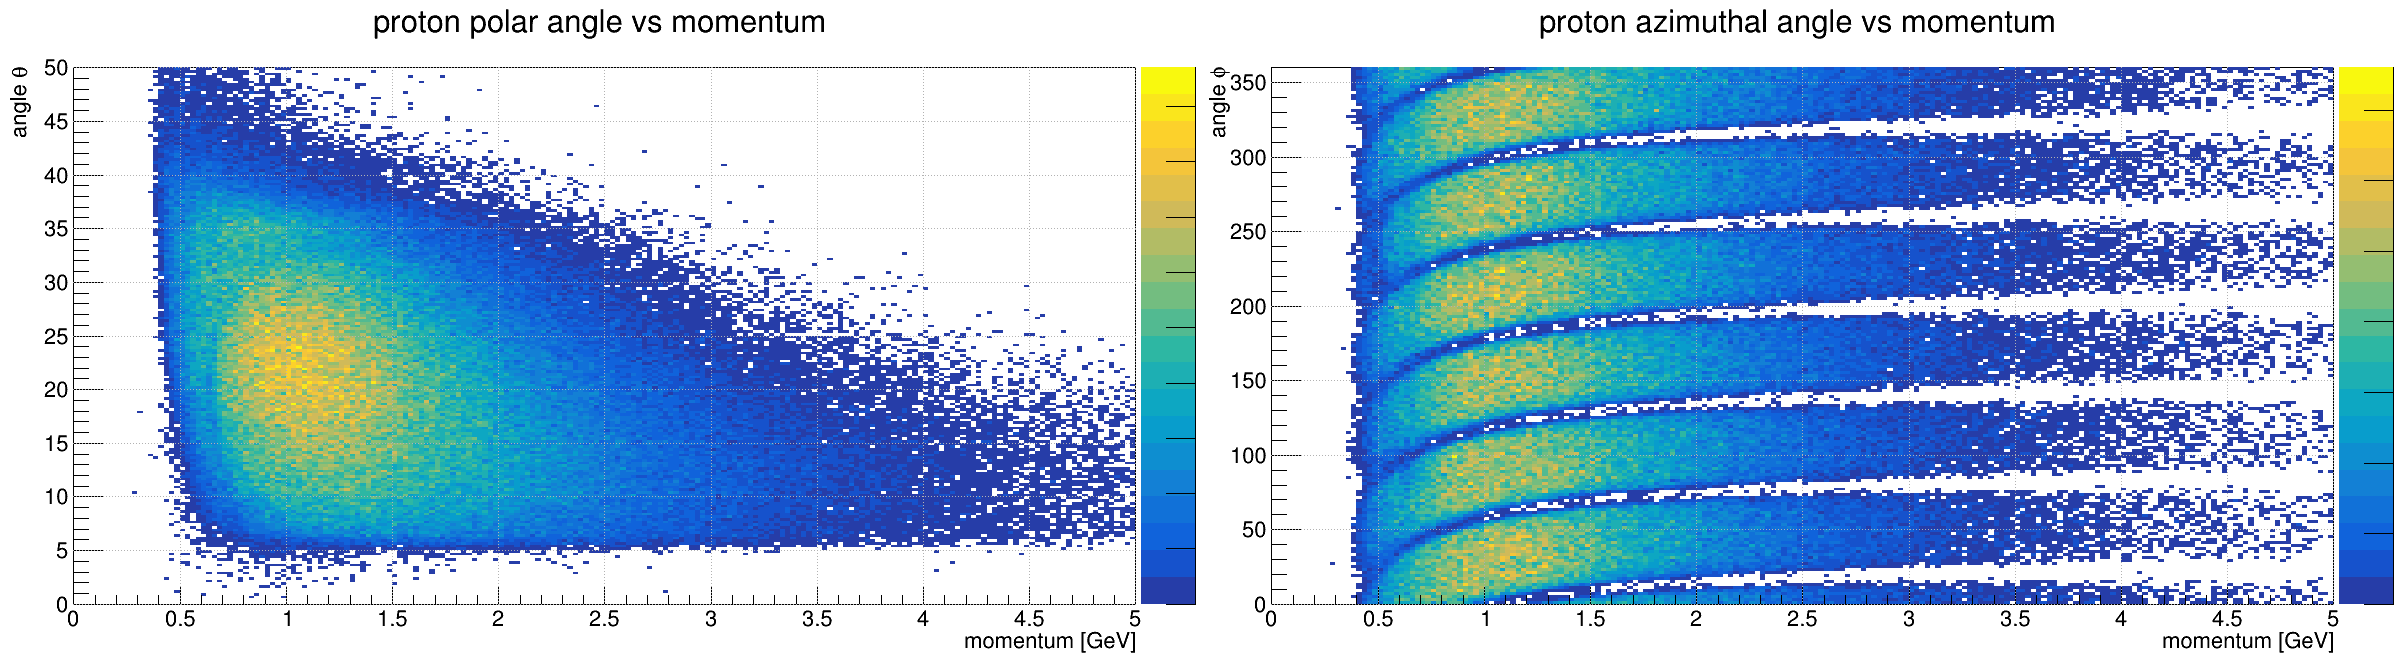

In [17]:
c1 = ROOT.TCanvas("c1","c1",2400,700)
c1.Divide(2,1,0.001,0.001)
c1.Draw()
c1.cd(1)
hpropth.Draw("colz")
c1.cd(2)
hpropfi.Draw("colz")
c1.Print(f"pdf/lvl1.proton.pthfi.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.gamma.pthfi.inb.pdf has been created


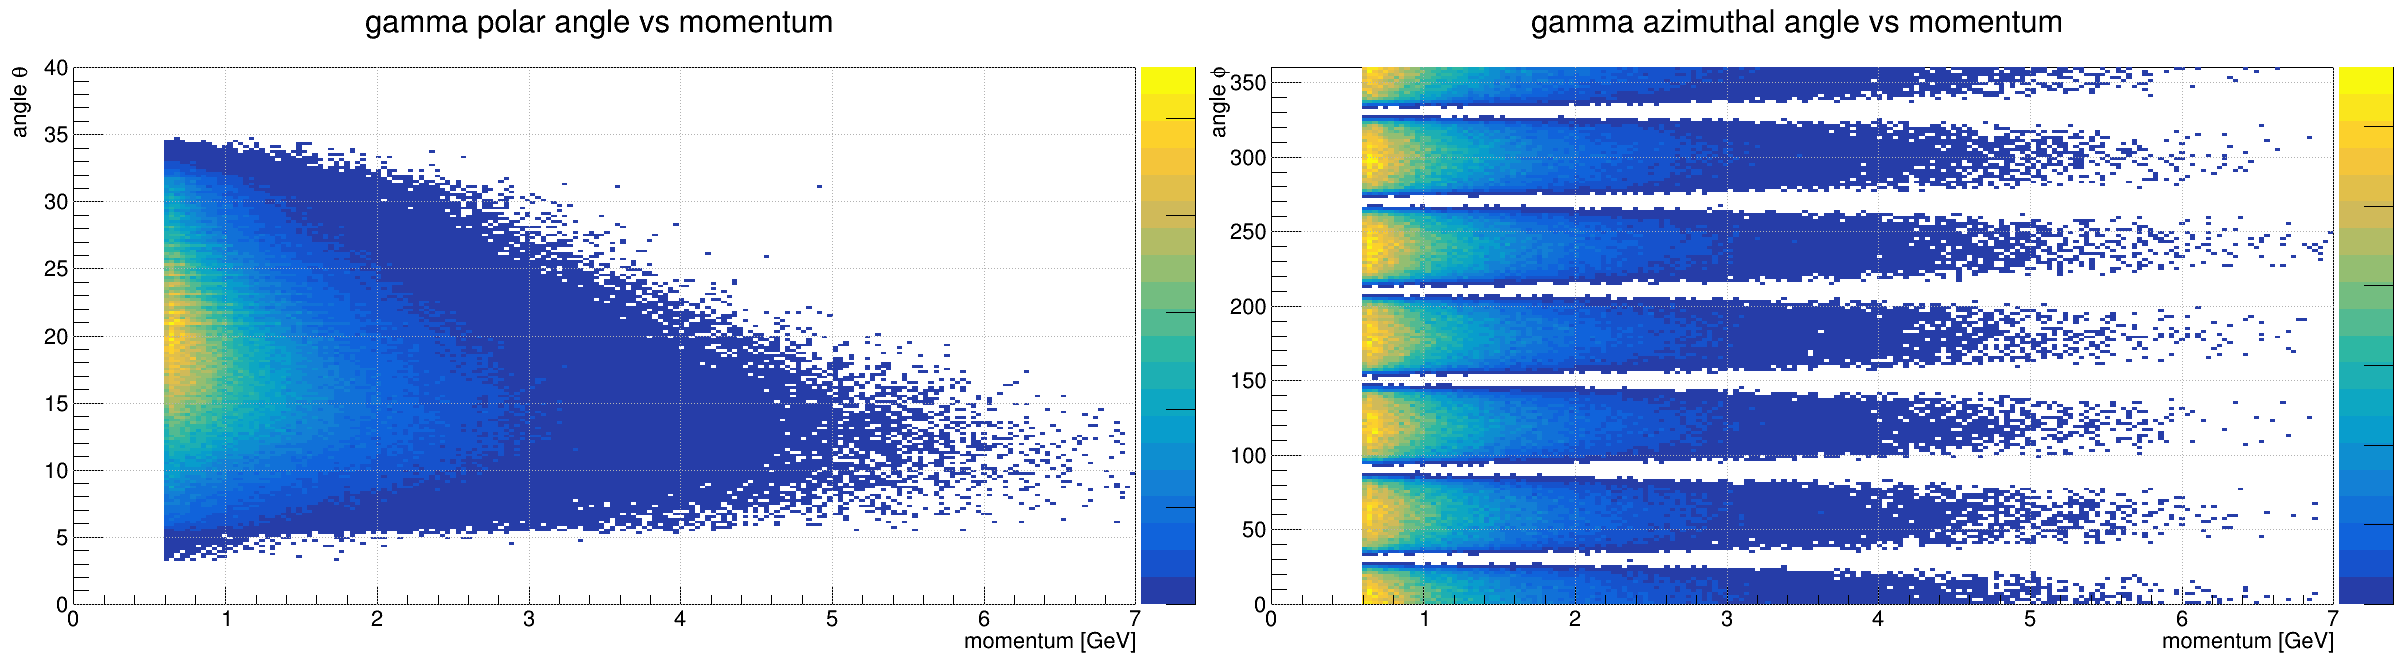

In [18]:
c1 = ROOT.TCanvas("c1","c1",2400,700)
c1.Divide(2,1,0.001,0.001)
c1.Draw()
c1.cd(1)

hgampth.Draw("colz")
c1.cd(2)
hgampfi.Draw("colz")
c1.Print(f"pdf/lvl1.gamma.pthfi.{dsid}.pdf")

---------------

---------------

---------------

# 2D plots of exclusive quantities vs $MM^2$

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.hdpxmm2.inb.pdf has been created


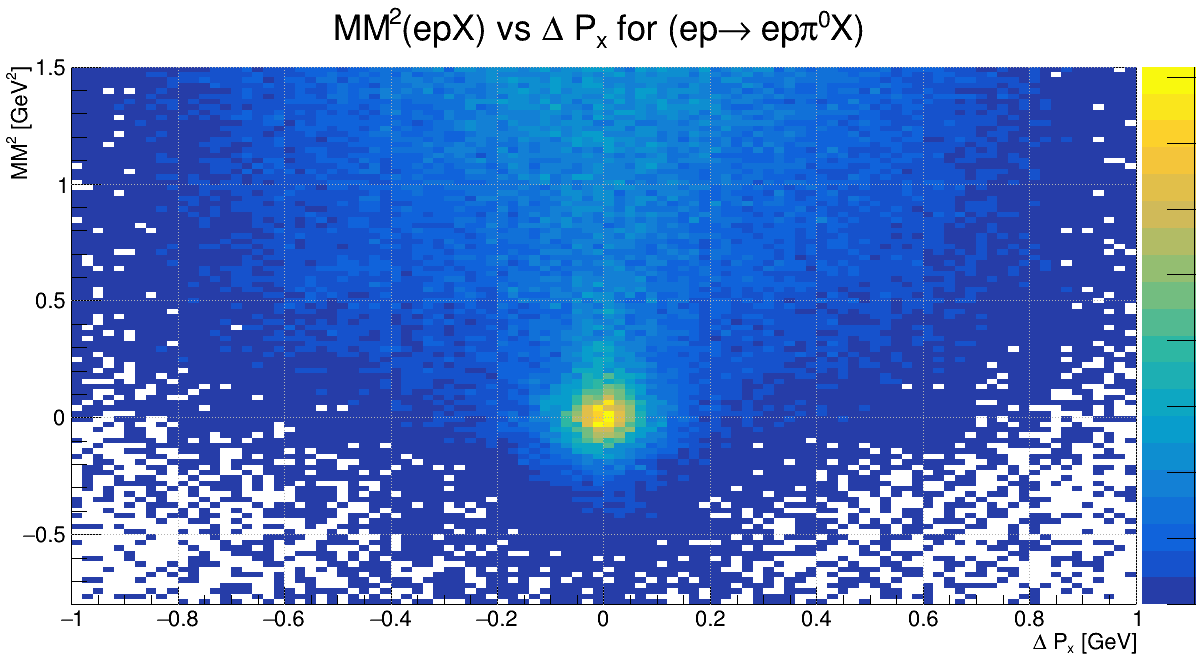

In [19]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hdpxmm2.Draw('colz')
c1.Print(f"pdf/lvl1.hdpxmm2.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.hdpymm2.inb.pdf has been created


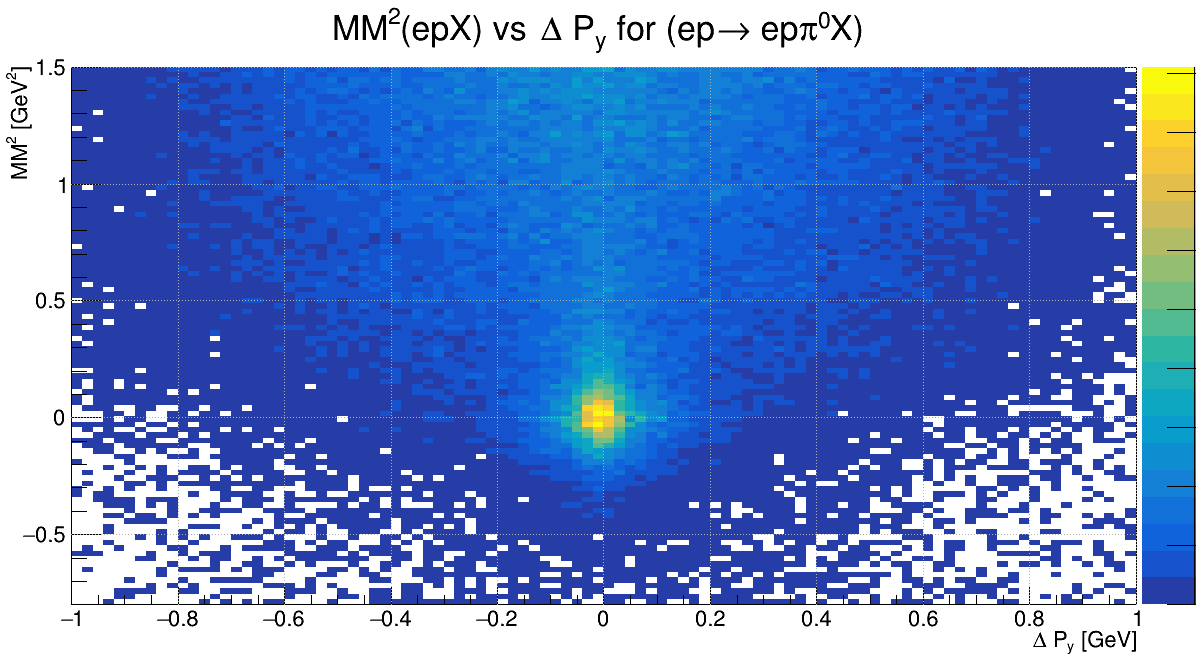

In [20]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hdpymm2.Draw('colz')
c1.Print(f"pdf/lvl1.hdpymm2.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.hdpzmm2.inb.pdf has been created


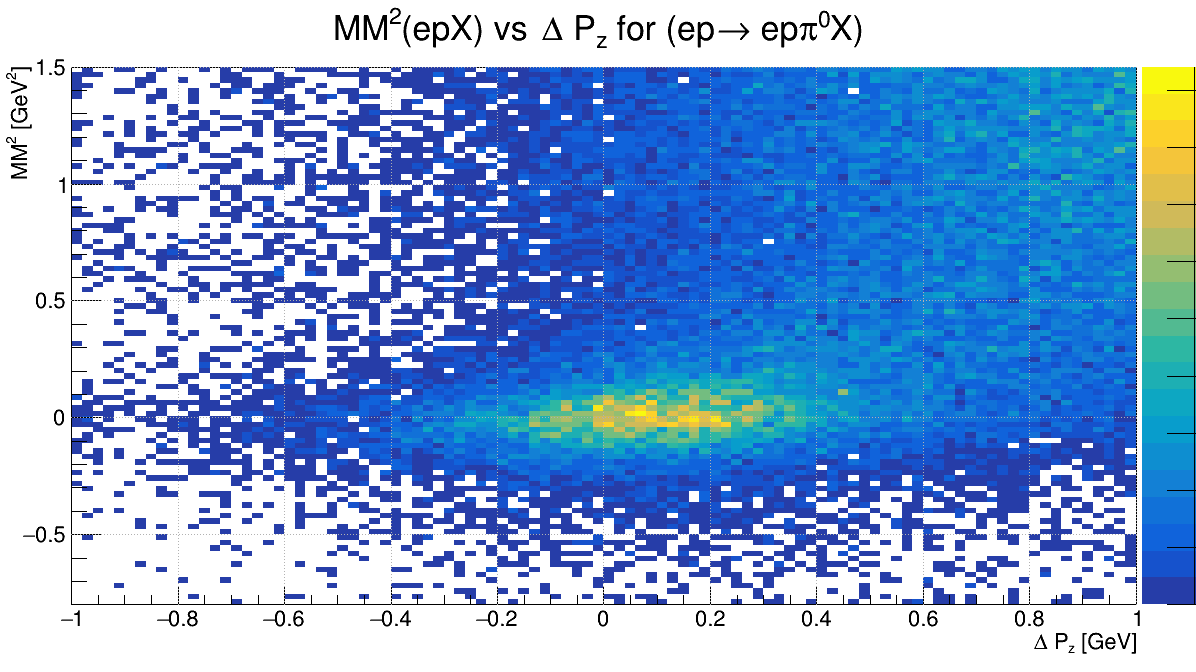

In [21]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hdpzmm2.Draw('colz')
c1.Print(f"pdf/lvl1.hdpzmm2.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.hmemm2.inb.pdf has been created


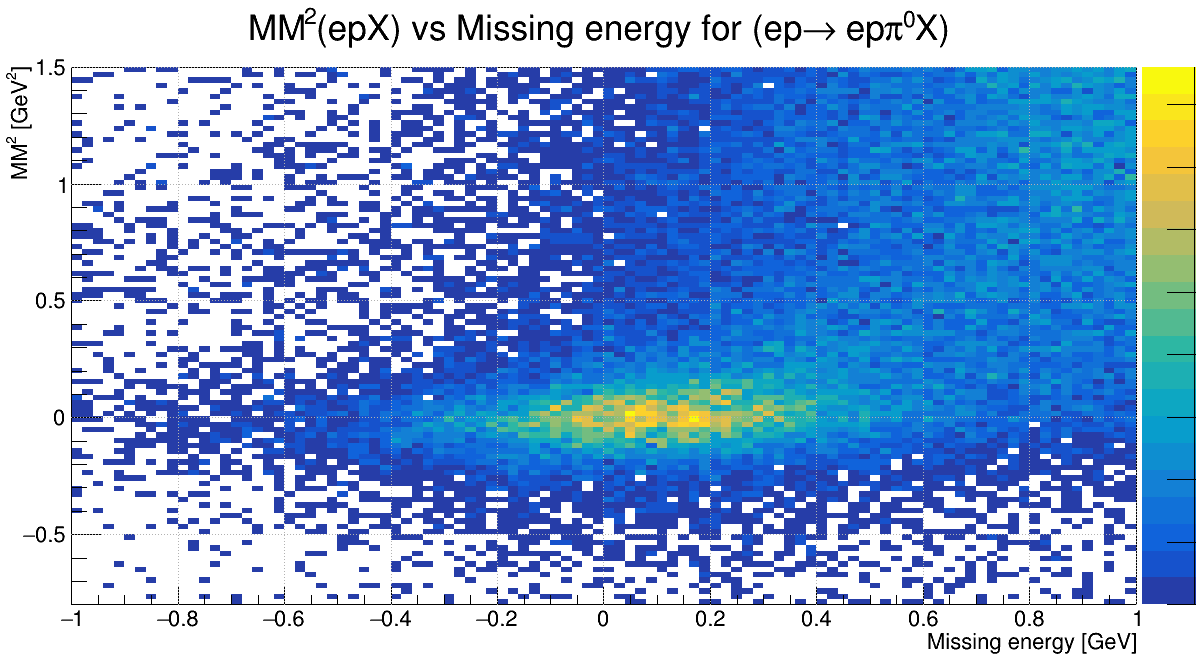

In [22]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hmemm2.Draw('colz')
c1.Print(f"pdf/lvl1.hmemm2.{dsid}.pdf")

---------------

---------------

---------------

# Missing mass$^2$ for epX

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.mm2.inb.pdf has been created


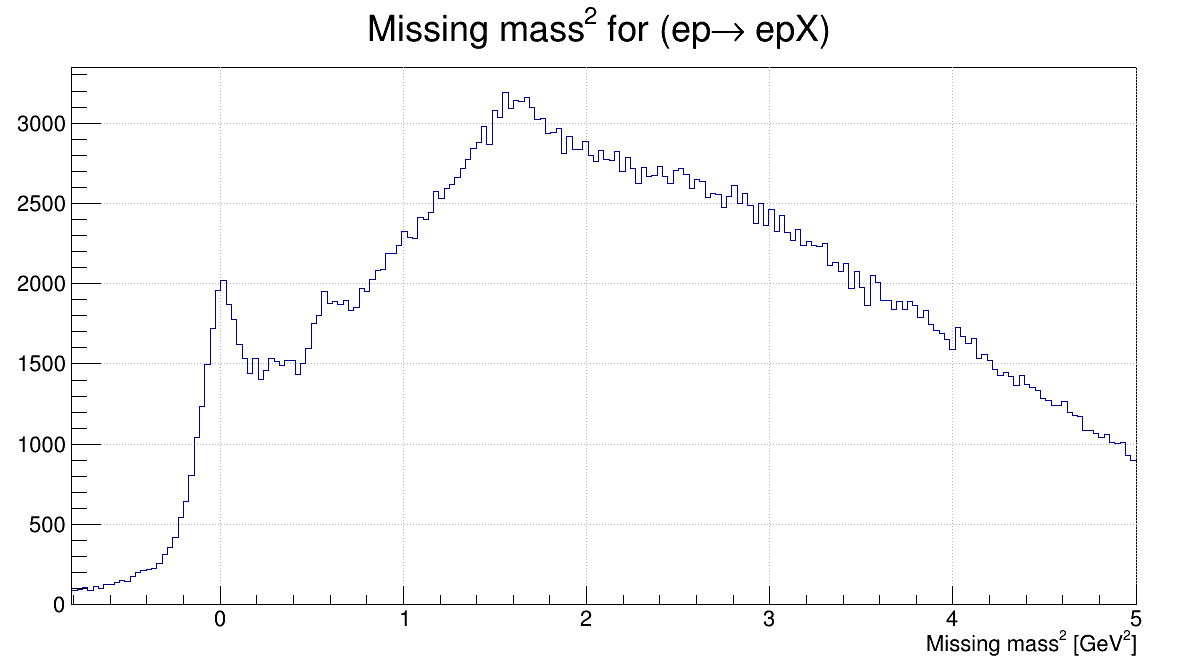

In [23]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hmm2.Draw()
c1.Print(f"pdf/lvl1.mm2.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.mm2zoom.inb.pdf has been created


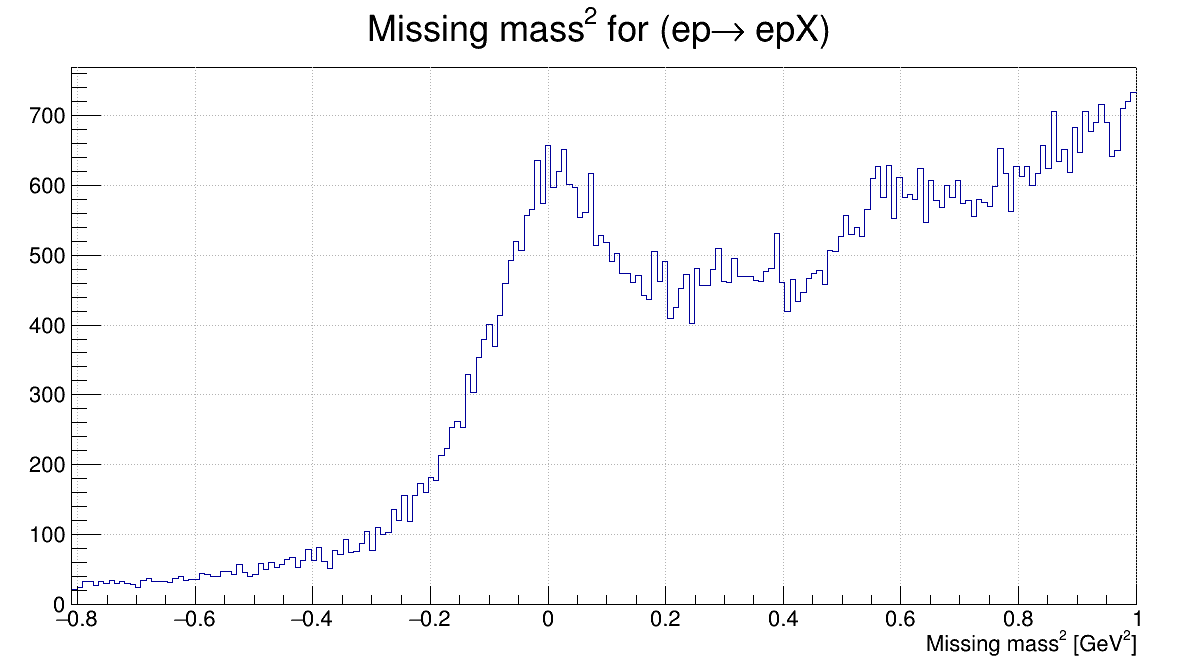

In [24]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
emm2.Draw()
c1.Print(f"pdf/lvl1.mm2zoom.{dsid}.pdf")

---------------

---------------

---------------

# Missing mass for $e\pi^0X$

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.mmp.inb.pdf has been created


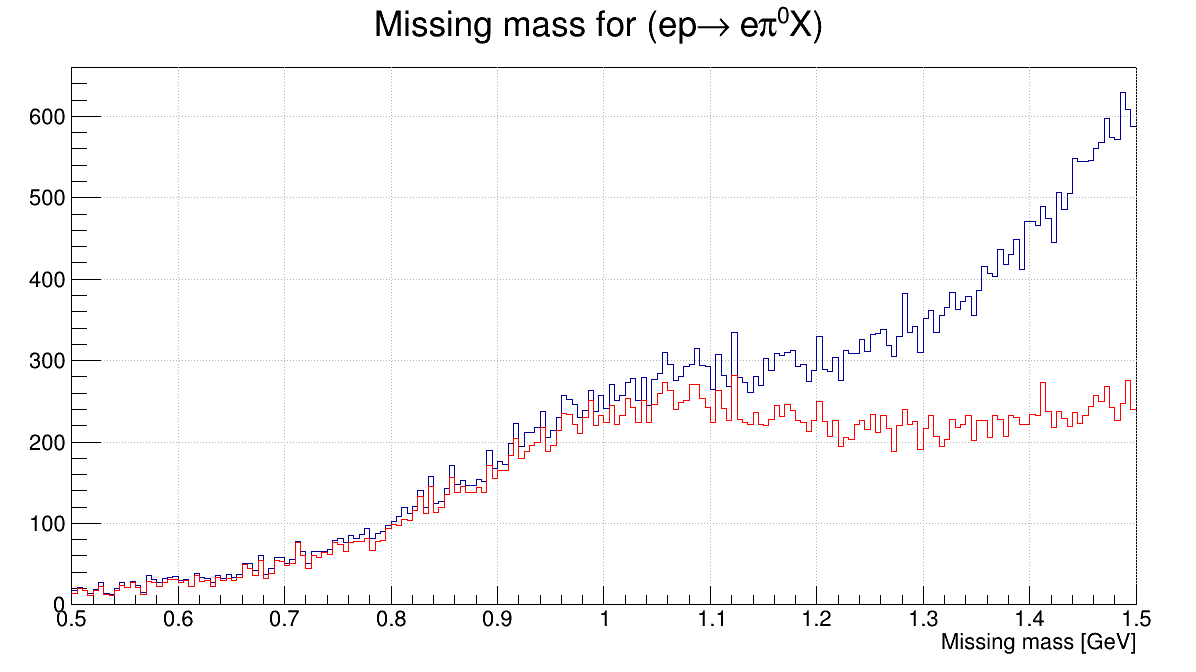

In [25]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hmmp.Draw()
emmp.SetLineColor(2)
emmp.Draw('same')
c1.Print(f"pdf/lvl1.mmp.{dsid}.pdf")

---------------

---------------

---------------

# Azimuthal angle between detected and expected pions

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dphi.inb.pdf has been created


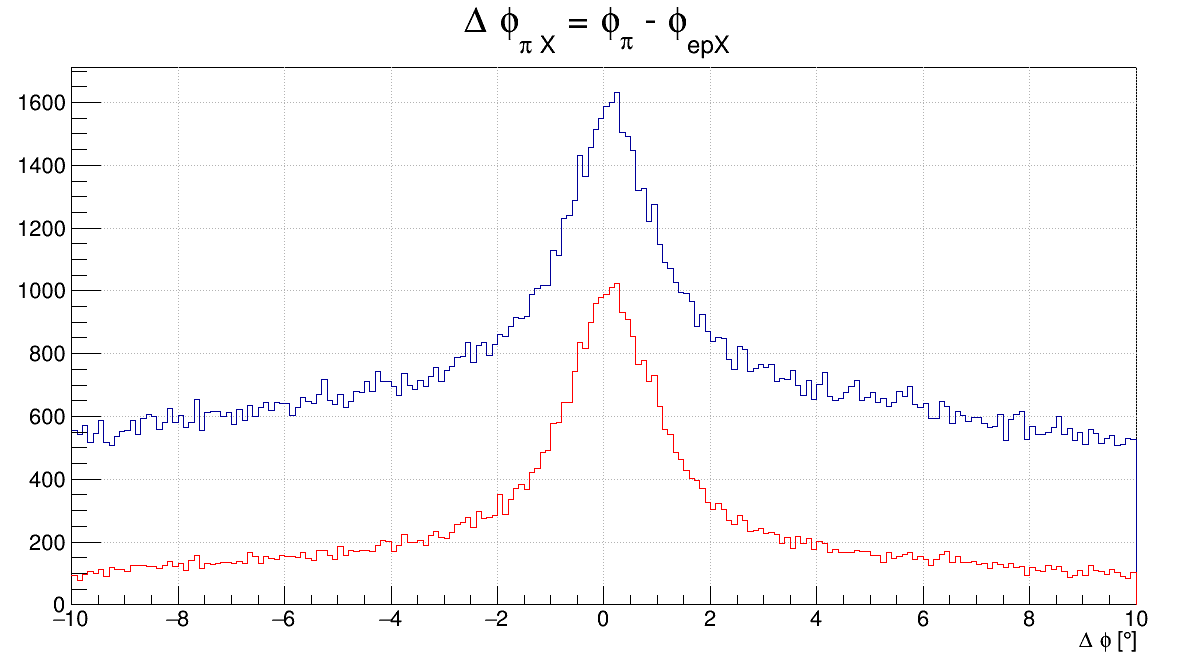

In [26]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hdphi.Draw()
hdphi.SetMinimum(0)
edphi.SetLineColor(2)
edphi.Draw('same')
c1.Print(f"pdf/lvl1.dphi.{dsid}.pdf")

---------------

---------------

---------------

# Missing energy

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.me.inb.pdf has been created


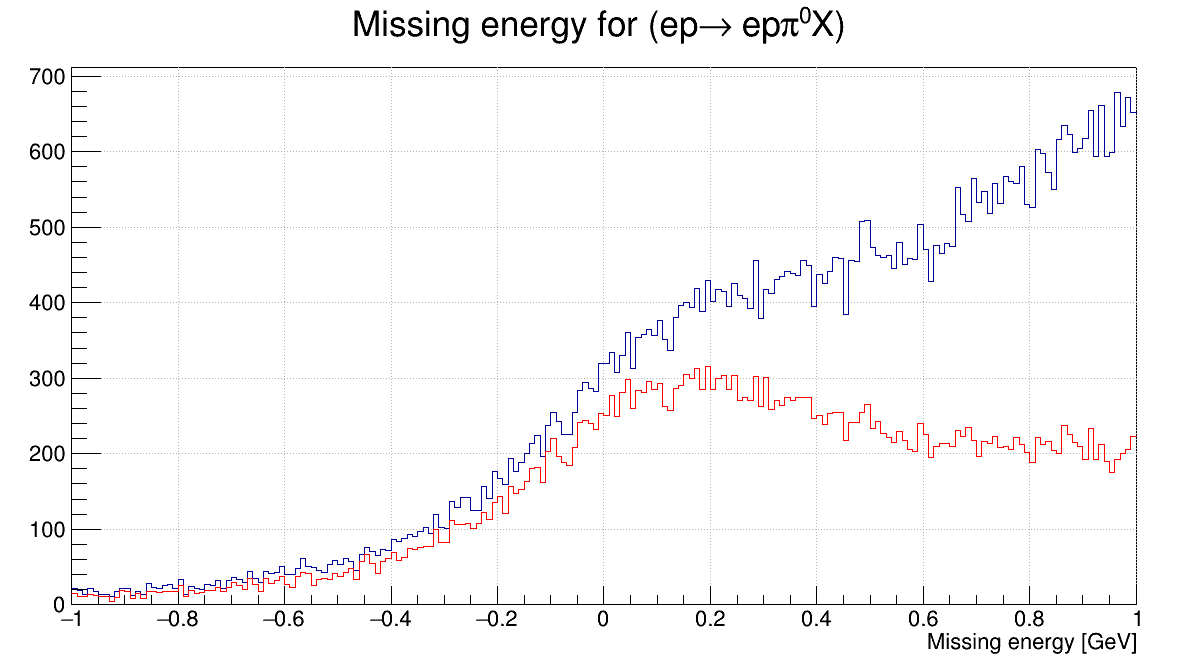

In [27]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hme.Draw()
hme.SetMinimum(0)
eme.SetLineColor(2)
eme.Draw('same')
c1.Print(f"pdf/lvl1.me.{dsid}.pdf")

---------------

---------------

---------------

# Missing $\Delta P_x$, $\Delta P_y$ and $\Delta P_z$

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dpx.inb.pdf has been created


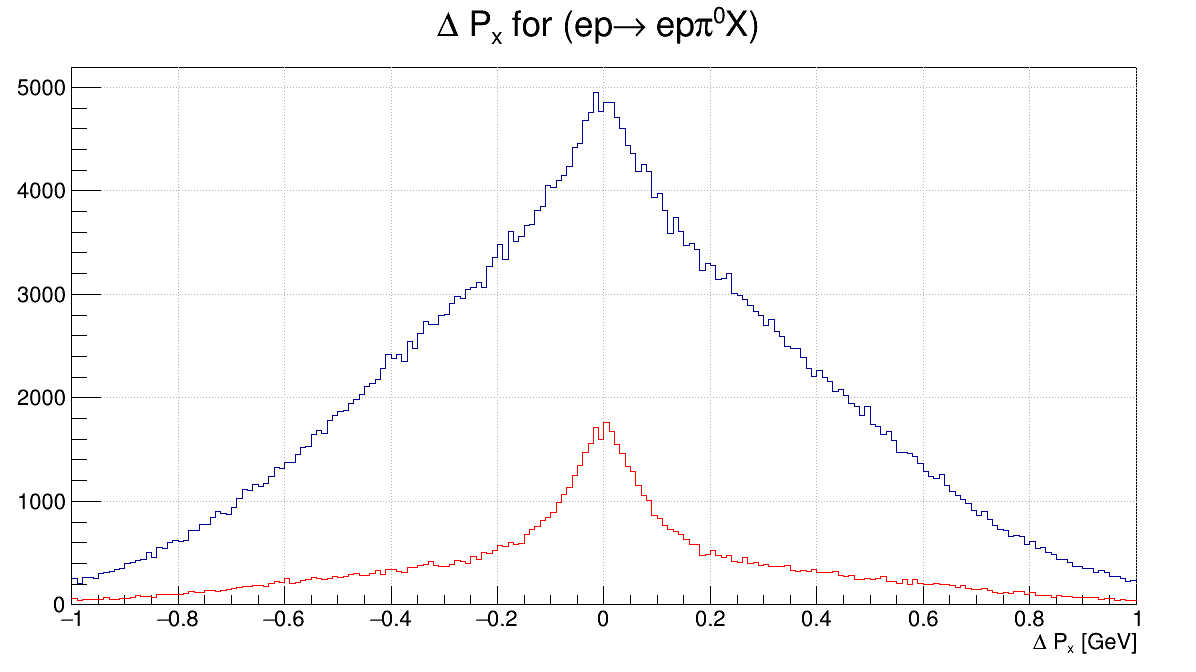

In [28]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hdpx.Draw()
edpx.SetLineColor(2)
edpx.Draw('same')
c1.Print(f"pdf/lvl1.dpx.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dpy.inb.pdf has been created


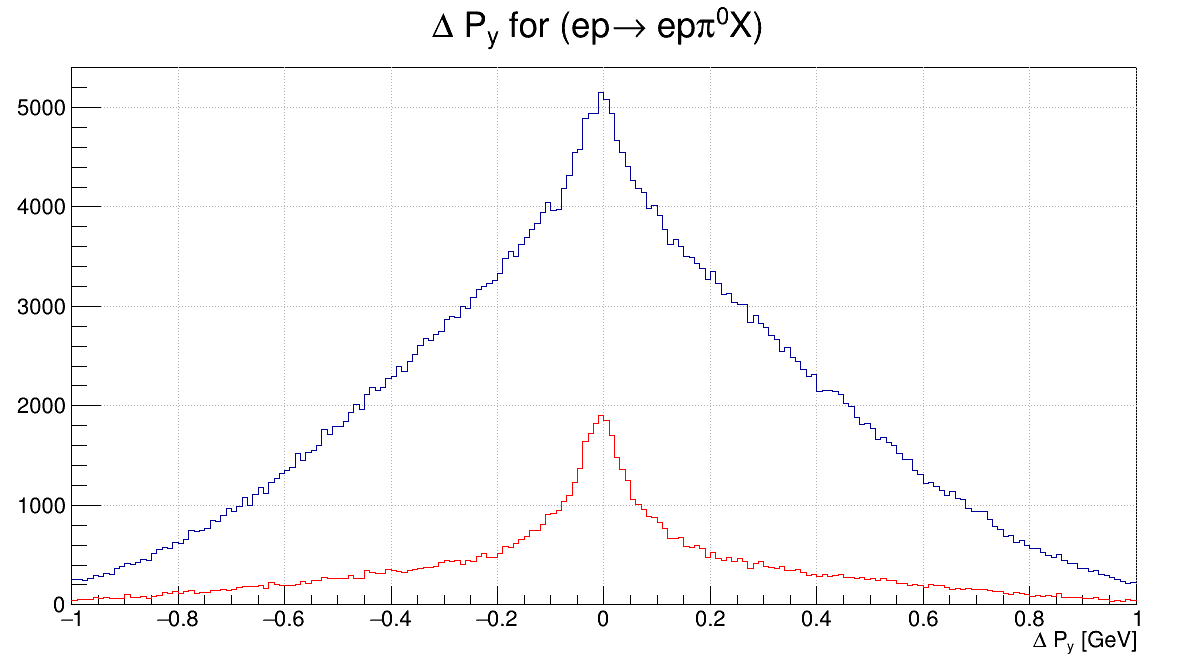

In [29]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hdpy.Draw()
edpy.SetLineColor(2)
edpy.Draw('same')
c1.Print(f"pdf/lvl1.dpy.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dpz.inb.pdf has been created


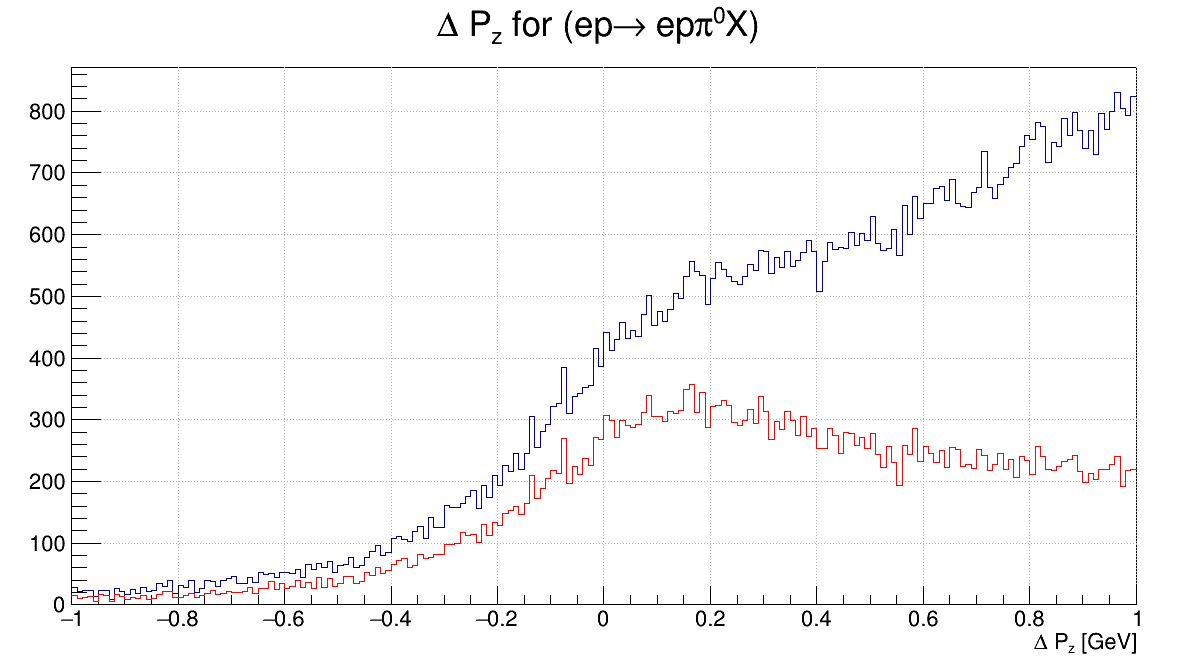

In [30]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hdpz.Draw()
edpz.SetLineColor(2)
edpz.Draw('same')
c1.Print(f"pdf/lvl1.dpz.{dsid}.pdf")

---------------

---------------

---------------

# Mass of two photons

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.mgg.inb.pdf has been created


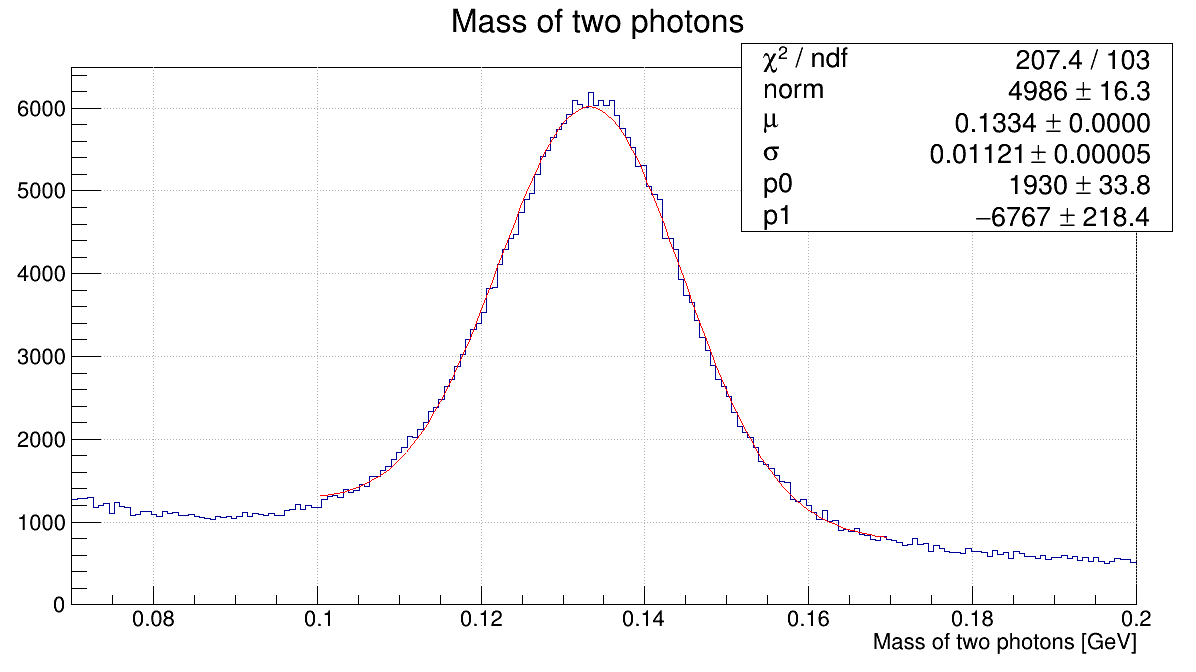

In [31]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hmgg.Draw()
fgg = ROOT.TF1("fgg."+str(id(hmgg)), "gaus(0)+pol1(3)", 0.1,0.17)
fgg.SetParNames("norm","#mu","#sigma","p0","p1")
fgg.SetParameters(1000,0.135,0.02,1,1)
fgg.SetLineWidth(1)
hmgg.Fit(fgg,'qr')
hmgg.SetMinimum(0)
c1.Print(f"pdf/lvl1.mgg.{dsid}.pdf")

---------------

---------------

---------------

# Fitting $\Delta\phi_{\pi X}$ after MM2 cut

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dphi.fit0.inb.pdf has been created


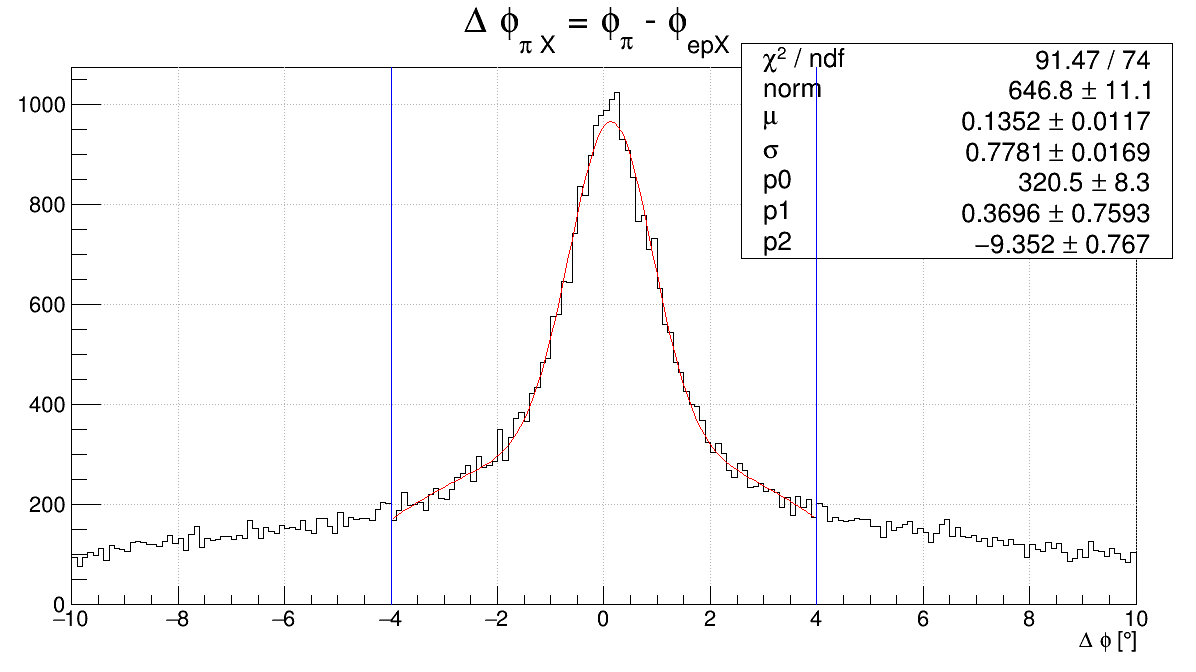

In [32]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol2(3)",-4,4)
f1.SetParameters(1000,0,0.1,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

edphi.SetMinimum(0)
edphi.SetLineColor(1)
edphi.Fit(f1,"qr")
ll.DrawLine(-4,0,-4,edphi.GetMaximum()*1.05)
ll.DrawLine(4,0,4,edphi.GetMaximum()*1.05)
c1.Print(f"pdf/lvl1.dphi.fit0.{dsid}.pdf")

---------------

---------------

---------------

# Fitting $\Delta\phi_{\pi X}$ after MM2, $\Delta P_x$ and $\Delta P_y$ cuts

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dphi.fit1.inb.pdf has been created


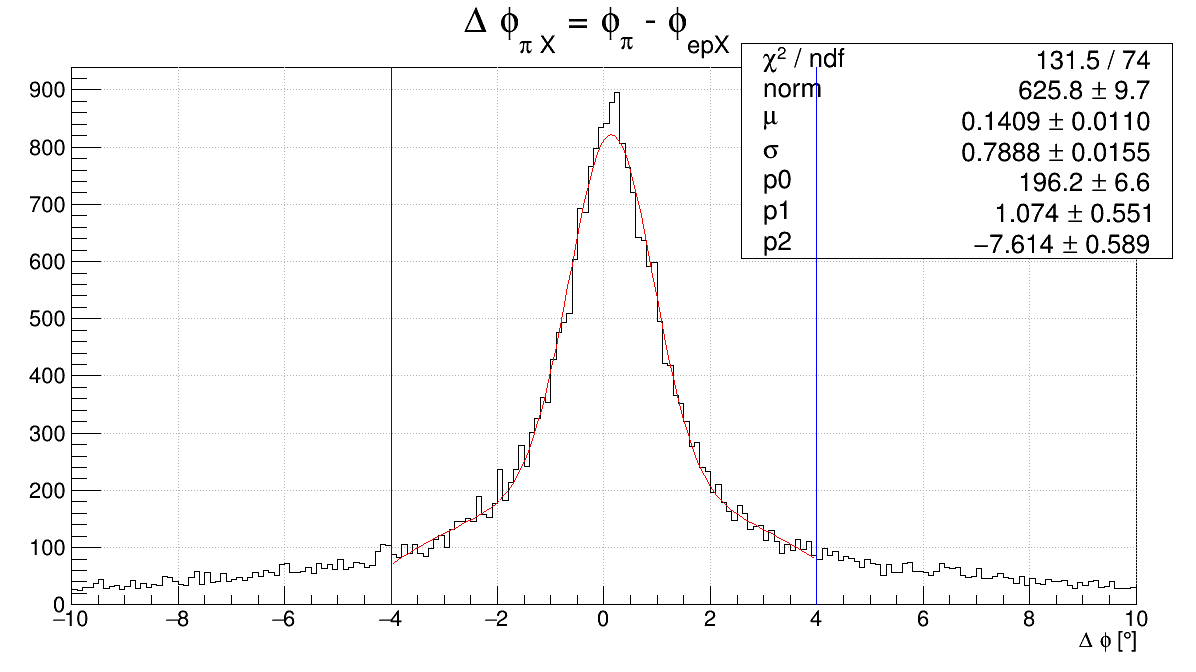

In [33]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol2(3)",-4,4)
f1.SetParameters(1000,0,0.1,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

ldphi.SetLineColor(1)
ldphi.Fit(f1,"qr")
ll.DrawLine(-4,0,-4,ldphi.GetMaximum()*1.05)
ll.DrawLine(4,0,4,ldphi.GetMaximum()*1.05)
c1.Print(f"pdf/lvl1.dphi.fit1.{dsid}.pdf")

---------------

---------------

---------------

# Fitting missing $\Delta P_x$ and $\Delta P_y$ after MM2 cut

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dpx.fit0.inb.pdf has been created


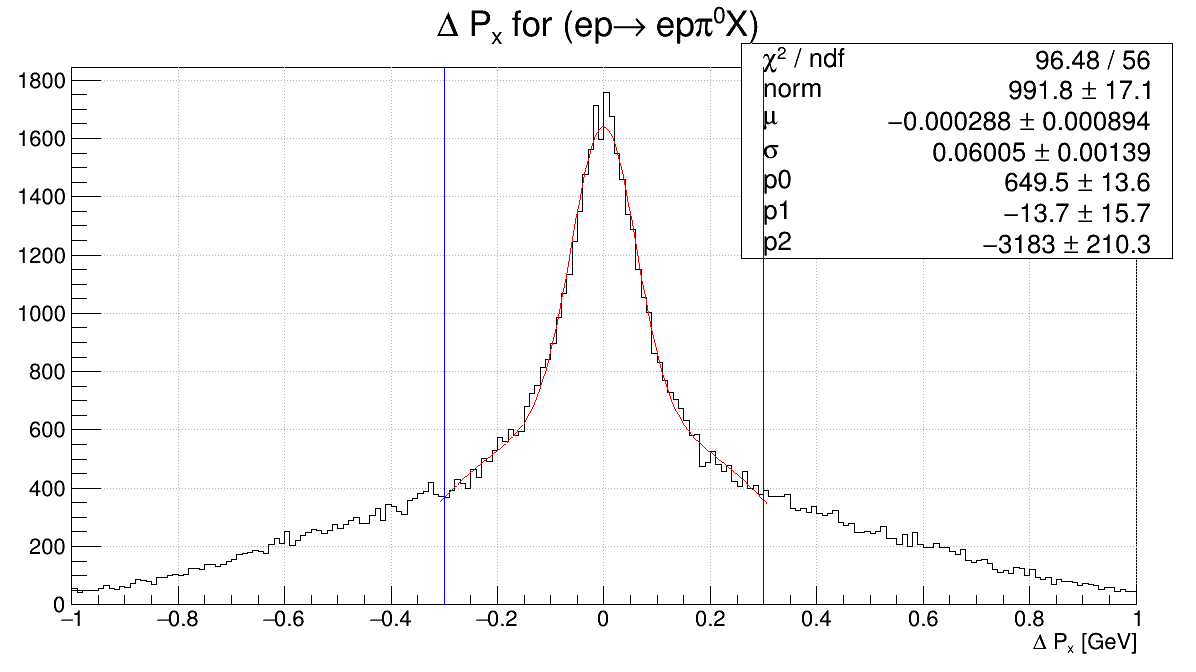

In [34]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol2(3)",-0.31,0.31)
f1.SetParameters(1000,0,0.1,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

edpx.SetLineColor(1)
edpx.Fit(f1,"qr")
ll.DrawLine(-0.3,0,-0.3,edpx.GetMaximum()*1.05)
ll.DrawLine(0.3,0,0.3,edpx.GetMaximum()*1.05)
c1.Print(f"pdf/lvl1.dpx.fit0.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dpy.fit0.inb.pdf has been created


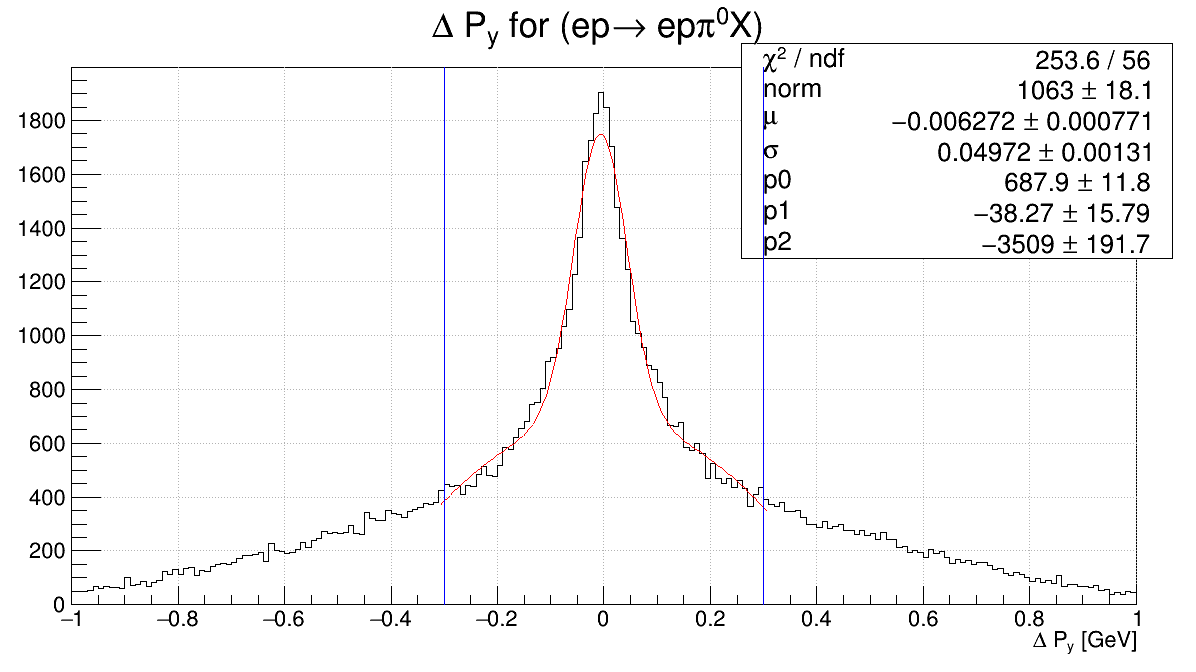

In [35]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol2(3)",-0.31,0.31)
f1.SetParameters(1000,0,0.1,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

edpy.SetLineColor(1)
edpy.Fit(f1,"qr")
ll.DrawLine(-0.3,0,-0.3,edpy.GetMaximum()*1.05)
ll.DrawLine(0.3,0,0.3,edpy.GetMaximum()*1.05)
c1.Print(f"pdf/lvl1.dpy.fit0.{dsid}.pdf")

---------------

---------------

---------------

# Fitting missing $\Delta P_x$ and $\Delta P_y$ after MM2 and $\Delta\phi$ cuts

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dpx.fit1.inb.pdf has been created


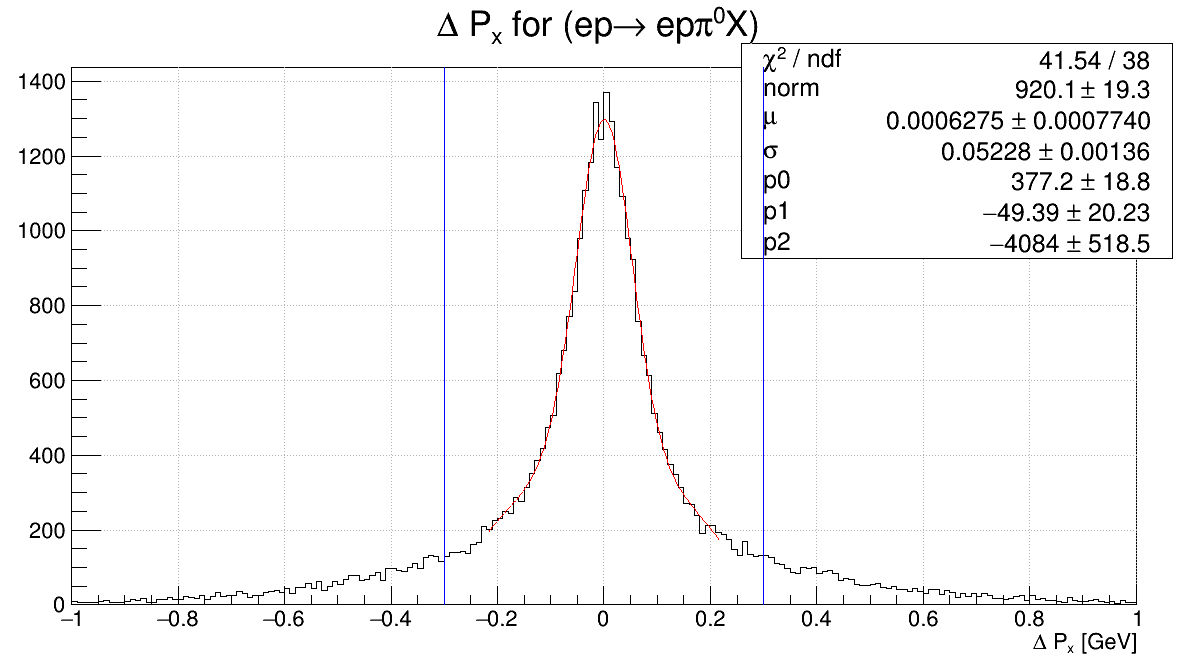

In [36]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol2(3)",-0.22,0.22)
f1.SetParameters(1000,0,0.1,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

kdpx.SetLineColor(1)
kdpx.Fit(f1,"qr")
ll.DrawLine(-0.3,0,-0.3,kdpx.GetMaximum()*1.05)
ll.DrawLine(0.3,0,0.3,kdpx.GetMaximum()*1.05)
c1.Print(f"pdf/lvl1.dpx.fit1.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dpy.fit1.inb.pdf has been created


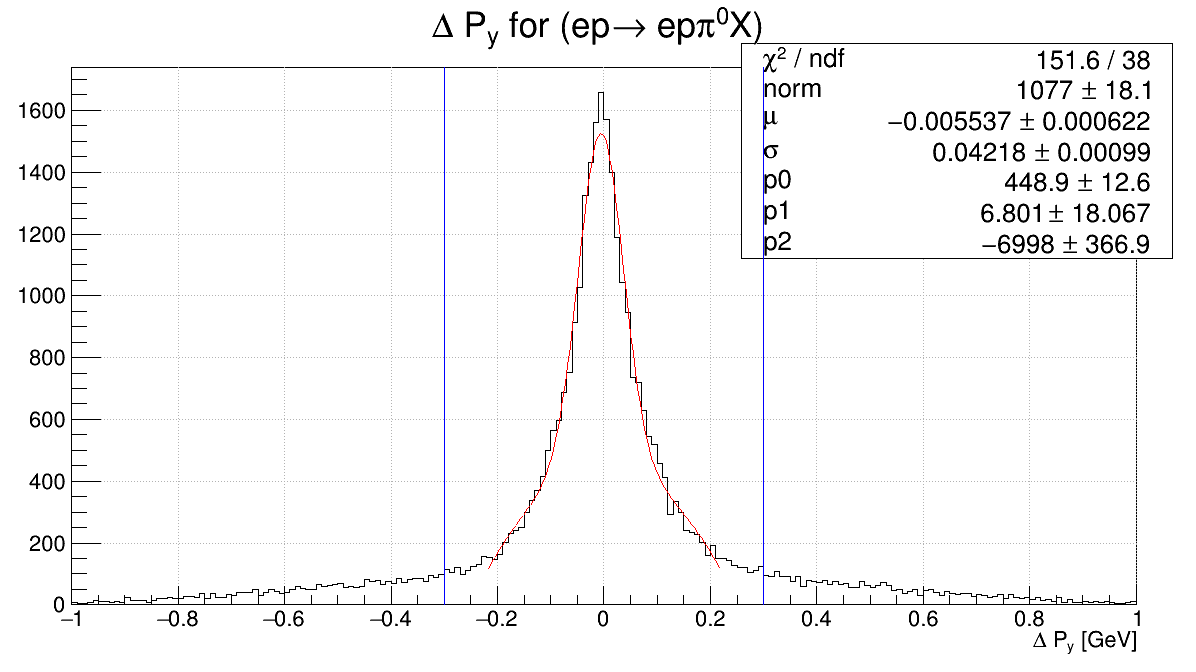

In [37]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol2(3)",-0.22,0.22)
f1.SetParameters(1000,0,0.1,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

kdpy.SetLineColor(1)
kdpy.Fit(f1,"qr")
ll.DrawLine(-0.3,0,-0.3,kdpy.GetMaximum()*1.05)
ll.DrawLine(0.3,0,0.3,kdpy.GetMaximum()*1.05)
c1.Print(f"pdf/lvl1.dpy.fit1.{dsid}.pdf")

---------------

---------------

---------------

# Fitting missing $\Delta P_z$ after MM2, $\Delta\phi$, $\Delta P_x$ and $\Delta P_y$ cuts

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.dpz.fit.inb.pdf has been created


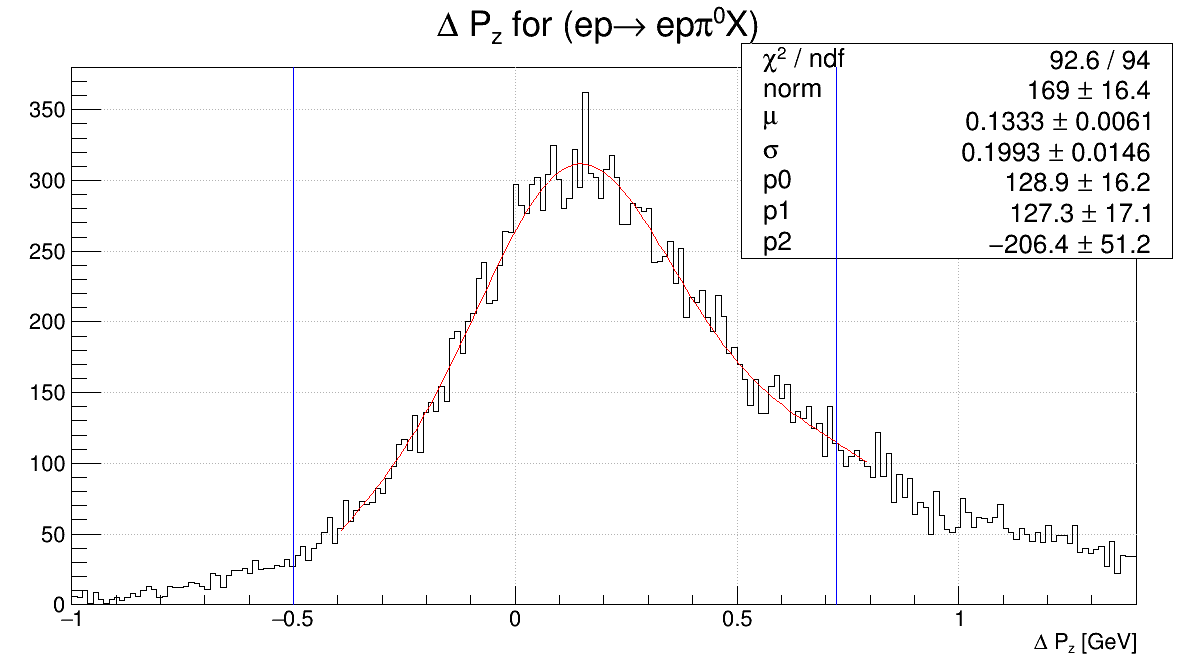

In [38]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol2(3)",-0.4,0.8)
f1.SetParameters(1000,0,0.1,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

mdpz.SetLineColor(1)
mdpz.Fit(f1,"qr")
ll.DrawLine(-0.5,0,-0.5,mdpz.GetMaximum()*1.05)
ll.DrawLine(0.725,0,0.725,mdpz.GetMaximum()*1.05)
c1.Print(f"pdf/lvl1.dpz.fit.{dsid}.pdf")

---------------

---------------

---------------

# Fitting $MM^2$ after $\Delta\phi$, $\Delta P_x$, $\Delta P_y$ and $\Delta P_z$ cuts

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.mm2.fit.inb.pdf has been created


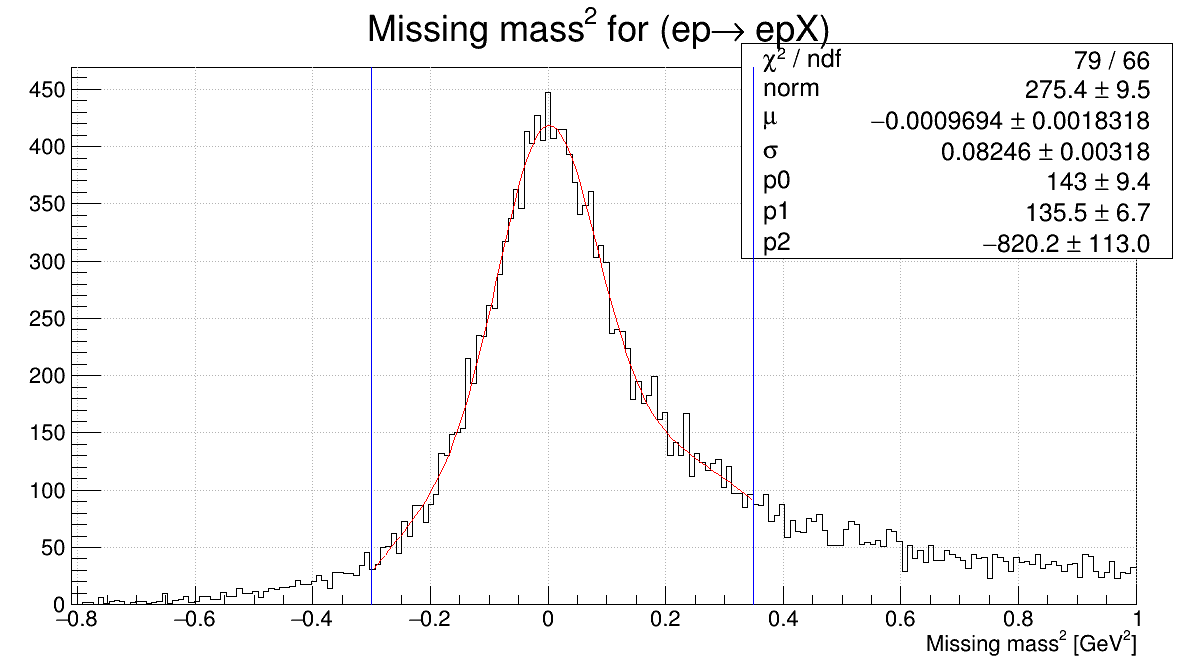

In [39]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol2(3)",-0.3,0.35)
f1.SetParameters(1000,0,0.1,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

nmm2.SetLineColor(1)
nmm2.Fit(f1,"qr")

ll.DrawLine(-0.3,0,-0.3,nmm2.GetMaximum()*1.05)
ll.DrawLine(0.35,0,0.35,nmm2.GetMaximum()*1.05)
c1.Print(f"pdf/lvl1.mm2.fit.{dsid}.pdf")

---------------

---------------

---------------

# Fitting $M_{\gamma\gamma}$ after $\Delta\phi$, $\Delta P_x$, $\Delta P_y$, $\Delta P_z$ and $MM^2$ cuts

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl1.mgg.fit.inb.pdf has been created


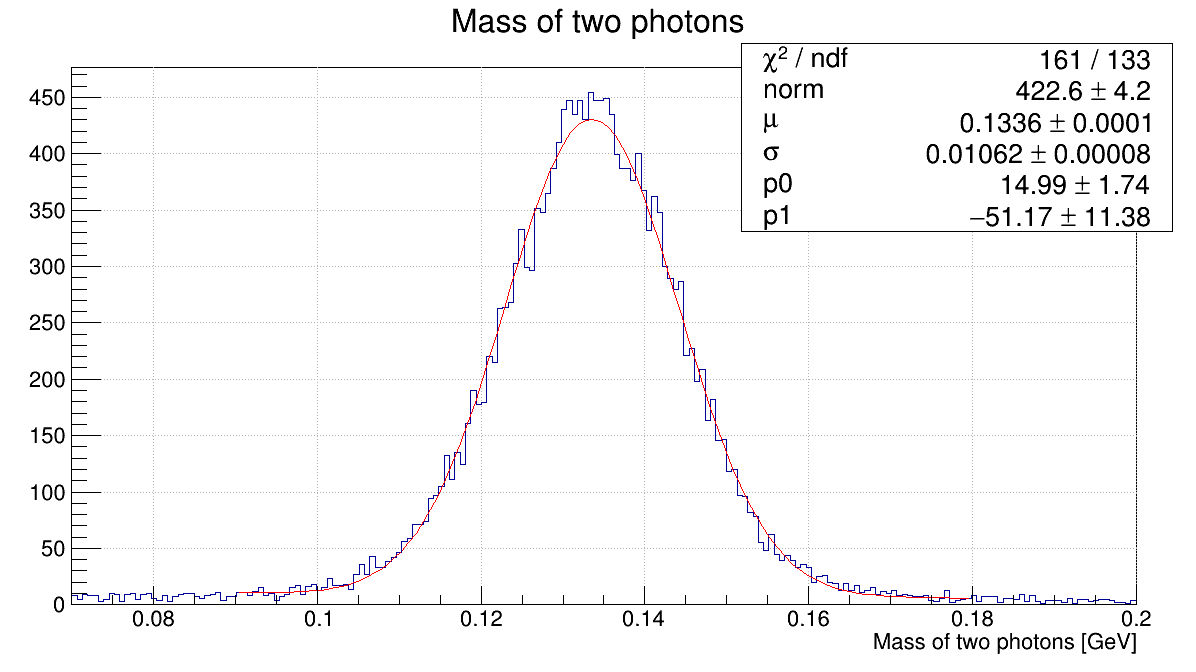

In [40]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
f1 = ROOT.TF1("f1","gaus(0)+pol1(3)",0.09,0.18)
f1.SetParameters(1000,0.135,0.01,1,1)
f1.SetParNames("norm","#mu","#sigma","p0",'p1','p2')
f1.SetLineWidth(1)

omgg.SetLineColor(1)
nmgg.Fit(f1,'qr')
c1.Print(f"pdf/lvl1.mgg.fit.{dsid}.pdf")